<a href="https://colab.research.google.com/github/ddarko98/ml-product-reviews-project/blob/main/big_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Map of steps:**

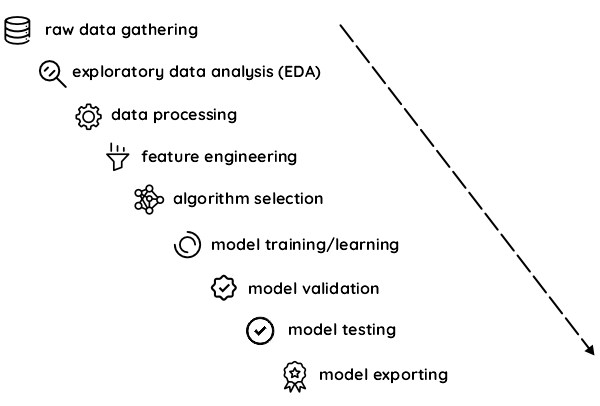

## **Loading libraries:**

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **I Raw data gathering:**

In [14]:
# load dataset from GitHub
url = "https://raw.githubusercontent.com/ddarko98/ml-product-reviews-project/main/data/IMLP4_13-product_reviews_full.csv"

df = pd.read_csv(url)

# **II Exploratory data analysis – EDA**

In [15]:
#Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

# Show first 5 rows
print("\nFirst 5 rows:")
display(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

df.describe()




Dataset shape (rows, columns): (171380, 6)

First 5 rows:


,review_uuid,product_name,product_price,review_title,review_text,sentiment
0,31b07b9a-4567-4db1-81f6-1bcef33b3e7b,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Super!,great cooler excellent air flow and for this p...,positive
1,1cb2b4b5-9805-4c2d-9393-6b1382cb7c53,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Awesome,best budget 2 fit cooler nice cooling,positive
2,f64165f0-29a2-4cfb-8b15-13c0c893e54d,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,the quality is good but the power of air is de...,positive
3,e442e083-a343-4052-b015-41e531e52d3e,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Useless product,very bad product its a only a fan,negative
4,f4abefb8-22f0-4672-af73-2aa2954b24e0,Candes 12 L Room/Personal Air Cooler??????(Whi...,48.18,Fair,ok ok product,Neutral



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


,review_uuid,product_name,product_price,review_title,review_text,sentiment
count,171380,171380,170954,171379,171379,166369
unique,171380,963,948,1336,85074,6
top,b633b374-67db-4538-9489-d51b9b9bdafe,Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...,2.63,Nan,good,positive
freq,1,5000,4483,24664,10864,85537


# **Missing rows:**

In [16]:

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())





Missing values per column:
review_uuid         0
product_name        0
product_price     426
review_title        1
review_text         1
sentiment        5011
dtype: int64


# **Data visualization**

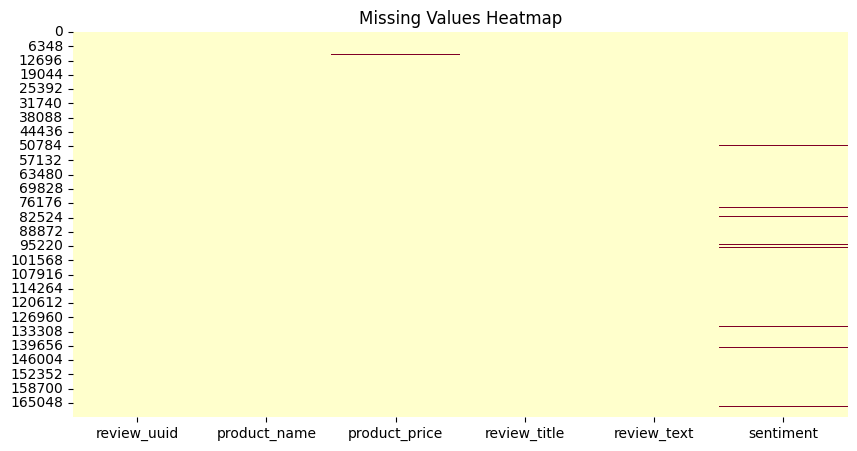

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

# **Sentiment distribution**

In [18]:
# Count occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Print counts
print("Sentiment distribution (counts):")
print(sentiment_counts)

Sentiment distribution (counts):
sentiment
positive    85537
negative    32369
Positive    22361
Negative    12392
neutral     10508
Neutral      3202
Name: count, dtype: int64


# **Visualisation of sentiment distribution**

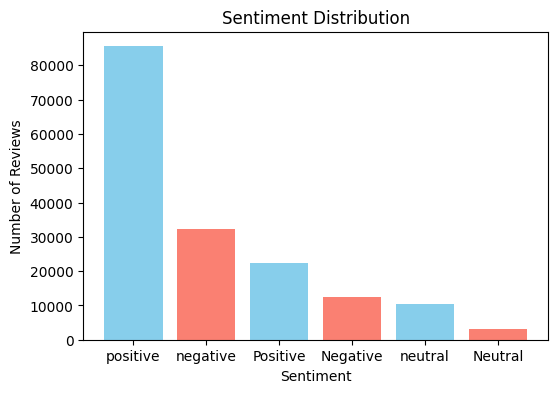

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

too much positive sentiments, model's will have training problems...
also, sentiments are not standardised

# **III Data processing (cleaning)**

In [20]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   review_uuid    171380 non-null  object
 1   product_name   171380 non-null  object
 2   product_price  170954 non-null  object
 3   review_title   171379 non-null  object
 4   review_text    171379 non-null  object
 5   sentiment      166369 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


every column is an object, which is okay, but product_name column has to be Int64

In [21]:
print("Data type of product_price column:", df['product_price'].dtype)

print("\nFirst 10 values in product_price column:")
print(df['product_price'].head(10))


print("\nTop 20 most frequent values in product_price column:")
print(df['product_price'].value_counts().head(20))


problematic_values = ['Free', 'Not Available', 'N/A', 'None', '-', 'free', 'unknown', 'Unavailable']

mask_problematic = df['product_price'].astype(str).str.strip().isin(problematic_values)
df_problematic = df[mask_problematic]
print(f"\nFound {len(df_problematic)} rows with problematic textual values:")
display(df_problematic[['product_price']].drop_duplicates())

price_clean = df['product_price'].astype(str).str.strip()
price_numeric = pd.to_numeric(price_clean, errors='coerce')

invalid_prices = df[price_numeric.isna()]
print("Number of non-numeric prices:", len(invalid_prices))
display(invalid_prices[['product_price']].drop_duplicates().head(20))



Data type of product_price column: object

First 10 values in product_price column:
0    48.18
1    48.18
2    48.18
3    48.18
4    48.18
5    48.18
6    48.18
7    48.18
8    48.18
9    48.18
Name: product_price, dtype: object

Top 20 most frequent values in product_price column:
product_price
2.63        4483
5.41        2648
$5.41       2577
19.27       2575
$2.63       2499
42.16       2242
168.66      2175
8.42        2103
6.01        1857
373.48      1824
3.6         1778
18.06       1710
$19.27      1671
$3.60       1608
96.37       1496
$168.66     1461
3.0         1395
$6.01       1359
3.24        1333
2.4         1321
Name: count, dtype: int64

Found 0 rows with problematic textual values:


,product_price


Number of non-numeric prices: 68858


,product_price
22,NaN
34279,$6.86
34512,$2.76
34553,$6.95
35245,$4.35
36212,$19.27
36613,$21.67
36622,$7.22
36753,$9.63
36766,$7.82


# **Removing missing values**

In [22]:
rows_before = len(df)

# Filter out rows that contain at least one missing value
rows_with_nan = df[df.isnull().any(axis=1)]

# Display a random sample of rows that will be removed
print(" Randomly selected rows containing missing values:\n")
print(rows_with_nan.sample(n=min(5, len(rows_with_nan)), random_state=42))

# Remove rows with any missing values
df_cleaned = df.dropna()

# Count the number of rows after removing missing values
rows_after = len(df_cleaned)

# Show removal statistics
print("\n Removal statistics:")
print(f"- Number of rows before: {rows_before}")
print(f"- Number of rows after: {rows_after}")
print(f"- Number of removed rows: {rows_before - rows_after}")


 Randomly selected rows containing missing values:

                                 review_uuid  \
138622  be155fca-c19b-4ca5-8a11-dcda5f334e18   
48332   0fcacd59-eb69-4c73-adb7-8bdd6c86cdbd   
10021   772ca541-7296-4065-b969-2eaef308623a   
9637    05b646fc-66a0-4d3b-a97a-ccb6b367eaa2   
156343  3a97cd00-5eea-4533-889c-c3ed7eedda36   

                                             product_name product_price  \
138622  SAMSUNG 253 L Frost Free Double Door 3 Star Re...      $295.06    
48332   Men Solid Single Breasted Casual Blazer??????(...       $38.54    
10021   CEAT Hitman Full Size Double Blade Poplar Cric...          3.96   
9637    Hindware Ripple 90 Auto Clean Wall Mounted Chi...        172.28   
156343  APPLE iPad (9th Gen) 64 GB ROM 10.2 inch with ...      $361.33    

                  review_title                            review_text  \
138622               Very Good  good design and effective performance   
48332                      Nan                                

# **Parsing product_price column**

In [23]:
# Step 1: Convert to string and remove the 'USD' prefix and any leading/trailing spaces
df['product_price_cleaned'] = (
    df['product_price']
    .astype(str)
    .str.replace(r'$', '', regex=True)    # Remove '$'
    .str.replace(r'[^\d.]', '', regex=True) # Remove all non-numeric characters except the dot
    .str.strip()
)


# Step 2: Convert cleaned string to float
df['product_price'] = pd.to_numeric(df['product_price_cleaned'], errors='coerce')

# Step 3: Drop the temporary column
df = df.drop(columns=['product_price_cleaned'])

# Step 4: Drop any rows where conversion failed (still NaN)
df = df.dropna(subset=['product_price'])

# Step 5: Confirm result
print("Column type after parsing:", df['product_price'].dtype)
print("\nPrice summary:")
print(df['product_price'].describe())

Column type after parsing: float64

Price summary:
count    170954.000000
mean         65.709872
std         135.789769
min           0.180000
25%           4.190000
50%          14.450000
75%          66.250000
max        1566.140000
Name: product_price, dtype: float64


# **Sentiment column standardisation**

In [24]:
# Step 1: Convert all sentiment values to lowercase and strip extra spaces
df['sentiment'] = df['sentiment'].astype(str).str.lower().str.strip()

# Step 2: Show all unique values in the sentiment column
print("Unique sentiment values after cleaning:")
print(df['sentiment'].value_counts())

# Step 3: Convert column type to 'category'
df['sentiment'] = df['sentiment'].astype('category')
print("\nSentiment column converted to type:", df['sentiment'].dtype)

Unique sentiment values after cleaning:
sentiment
positive    107619
negative     44663
neutral      13678
nan           4994
Name: count, dtype: int64

Sentiment column converted to type: category


# **IV Feature engineering** (transofrming data into something relevant for future model)

In [25]:
# Drop columns that are not useful for modeling
df = df.drop(columns=['review_uuid', 'product_name'])

# Preview remaining columns
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['product_price', 'review_title', 'review_text', 'sentiment']
